<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine_Learning_Project/blob/main/Image_Classification_with_CNN_Classifying_Rock_Paper_Scissors_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Dataset**

## **Menunggah dataset dengan wget command**

In [17]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-14 03:08:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  9.07MB/s    in 55s     

2021-07-14 03:09:41 (5.61 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



## **Ekstrak file rockpaperscissors.zip**

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/ProjectML1')
zip_ref.close()

base_dir = '/tmp/ProjectML1/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

## **Membagi data ke dalam data training dan data validation dengan split-folders**

In [5]:
!pip install split-folders
import splitfolders
splitfolders.ratio ("/tmp/ProjectML1/rockpaperscissors/rps-cv-images", 
                    output= "/tmp/ProjectML1/rockpaperscissors/", 
                    seed = 2188, ratio= (.6, .4)) # ratio validasi 40%

Copying files: 2188 files [00:00, 4545.40 files/s]


## **Mengecek jumlah data pada masing-masing data training dan validation (dengan 40% merupakan data validation)**

In [6]:
paper_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/paper'))
rock_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/rock'))
scissors_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/scissors'))

print('Total Gambar paper dalam train: ', paper_train_len)
print('Total Gambar rock dalam train: ', rock_train_len)
print('Total Gambar scissors dalam train: ', scissors_train_len)
print('Total Seluruh Gambar dalam train: ', paper_train_len + rock_train_len + scissors_train_len)

Total Gambar paper dalam train:  427
Total Gambar rock dalam train:  435
Total Gambar scissors dalam train:  450
Total Seluruh Gambar dalam train:  1312


In [7]:
paper_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/paper'))
rock_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/rock'))
scissors_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/scissors'))

print('Total Gambar paper dalam val: ', paper_val_len)
print('Total Gambar rock dalam val: ', rock_val_len)
print('Total Gambar scissors dalam val: ', scissors_val_len)
print('Total Seluruh Gambar dalam val: ', paper_val_len + rock_val_len + scissors_val_len)

Total Gambar paper dalam val:  285
Total Gambar rock dalam val:  291
Total Gambar scissors dalam val:  300
Total Seluruh Gambar dalam val:  876


# **Visualisasi Data**

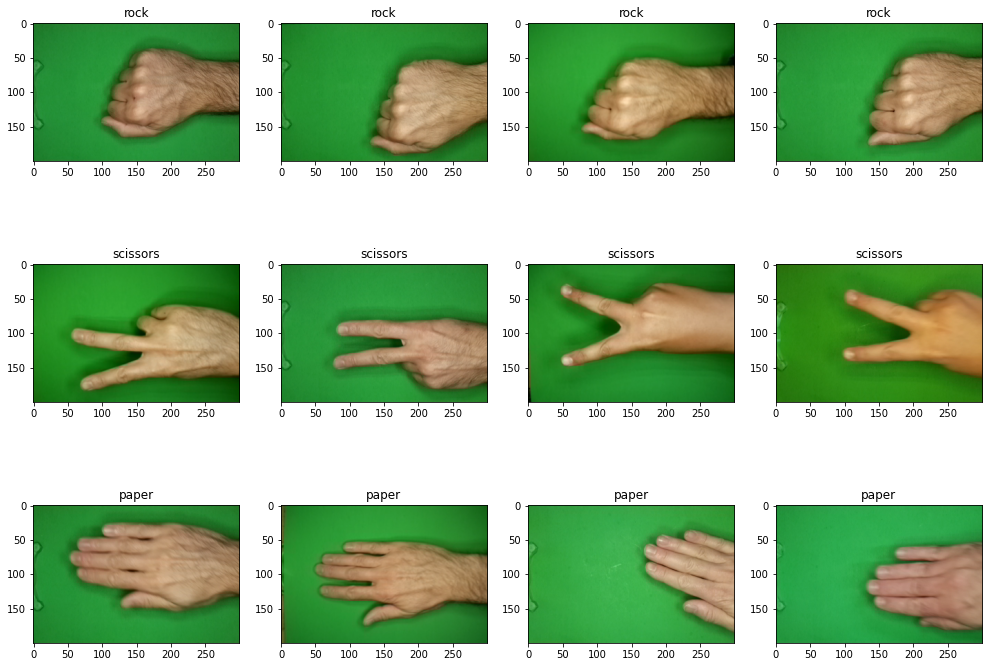

In [8]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img

train_dir = "/tmp/ProjectML1/rockpaperscissors/train/" #dont fotget add slash in end of path
test_dir = "/tmp/ProjectML1/rockpaperscissors/val/" #dont fotget add slash in end of path

#store these folder names in a list format in a variable called classes
classes = os.listdir("/tmp/ProjectML1/rockpaperscissors/train")

#create an empty dictionary
files_path_dict = {} 
'''
in this dict, the key will be the class name and 
the corresponding value will be a list of all the file names 
contained within a particular class folder
'''
for c in classes:
  files_path_dict[c] = list(map(lambda x: train_dir+c+'/'+x, os.listdir(train_dir+c)))


#plot the images so that can visualize them
#create matplotlib figure, with figure size as a 17 by 17
plt.figure(figsize=(17,17))

#declare a variable called index and will initialize it with zero
index = 0

for c in classes:
  random.shuffle(files_path_dict[c]) 
  '''random shuffling for whenever run this code, 
  I want that every time a new set of figures are generated 
  and random images are taken from the folders'''
  path_list = files_path_dict[c][:5]

  for i in range(1, 5):
    index += 1
    plt.subplot(4,4, index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

## **Menampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabel.**

In [9]:
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori rock pada direktori data validasi
val_rock_dir = os.path.join(val_dir, 'rock')

# membuat direktori paper pada direktori data validasi
val_paper_dir = os.path.join(val_dir, 'paper')

# membuat direktori scissors pada direktori data validasi
val_scissors_dir = os.path.join(val_dir, 'scissors')

## **Augmentasi Gambar**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest')

## **Mempersiapkan Data Latih dan Data Validasi Dengan Image Data Generator**

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=16,
    # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
    val_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=12, 
    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **Membangun Arsitektur CNN**

## **Melakukan model sequential (Konvolusi, MaxPooling, Fully Connected)**

In [18]:


model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# **Membuat Fungsi Callback**

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

# **Compile CNN**

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# **Pelatihan Model**

In [23]:
# latih model dengan model.fit 
history = model.fit(
                    train_generator,
                    steps_per_epoch=82,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=15, # tambahkan eposchs jika akurasi model belum optimal
                    callbacks=[callbacks],
                    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=73,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2)

Epoch 1/15
82/82 - 58s - loss: 1.1001 - accuracy: 0.3445 - val_loss: 1.1204 - val_accuracy: 0.3425
Epoch 2/15
82/82 - 57s - loss: 0.9832 - accuracy: 0.4787 - val_loss: 0.6234 - val_accuracy: 0.7363
Epoch 3/15
82/82 - 56s - loss: 0.6179 - accuracy: 0.7370 - val_loss: 0.4327 - val_accuracy: 0.8219
Epoch 4/15
82/82 - 56s - loss: 0.5097 - accuracy: 0.7927 - val_loss: 0.4118 - val_accuracy: 0.8493
Epoch 5/15
82/82 - 59s - loss: 0.4558 - accuracy: 0.8155 - val_loss: 0.3413 - val_accuracy: 0.8824
Epoch 6/15
82/82 - 56s - loss: 0.3966 - accuracy: 0.8491 - val_loss: 0.2722 - val_accuracy: 0.8950
Epoch 7/15
82/82 - 56s - loss: 0.2866 - accuracy: 0.9085 - val_loss: 0.1704 - val_accuracy: 0.9498
Epoch 8/15
82/82 - 57s - loss: 0.2768 - accuracy: 0.9047 - val_loss: 0.1664 - val_accuracy: 0.9475
Epoch 9/15
82/82 - 57s - loss: 0.1837 - accuracy: 0.9421 - val_loss: 0.1679 - val_accuracy: 0.9543
Epoch 10/15
82/82 - 57s - loss: 0.1869 - accuracy: 0.9474 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 11/

# **Menampilkan Grafik Selama Pelatihan**

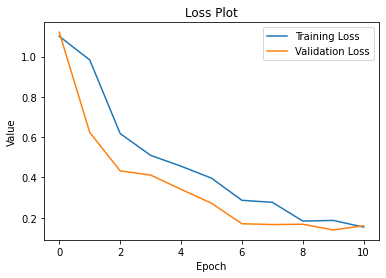

In [24]:
from matplotlib import pyplot as plt

#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.show()

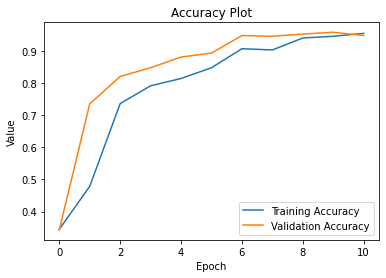

In [25]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

plt.show()

Saving IMG20210428064409.jpg to IMG20210428064409 (1).jpg
IMG20210428064409.jpg
0
paper


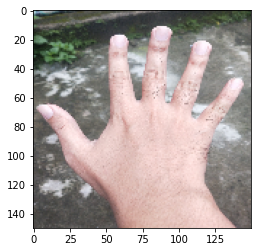

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
pred_indices = train_generator.class_indices

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=12)

  prediction = np.argmax(classes)
  print(fn)
  print(prediction)
  for key, value in pred_indices.items():
    if value == prediction:
      print(key)